<a href="https://colab.research.google.com/github/shalinivaggu/CreditCardFraudDetection/blob/main/creditCard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#step 1 : Installation and setup


In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install scikit-learn==1.2.2 xgboost --upgrade

#step-2: Importing the dataset from kaggle to google colab

In [ ]:
#install kaggle API
! pip install kaggle

In [ ]:
#create a directory as kaggle
! mkdir -p ~/.kaggle

In [ ]:
#import kaggle API
from google.colab import files
uploaded = files.upload()

Saving kaggle.json to kaggle (2).json


In [ ]:
# copy API key to kaggle directory
!cp kaggle.json ~/.kaggle

In [ ]:
#disable the API key
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#list of datasets
! kaggle datasets list

ref                                                              title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
stealthtechnologies/predict-student-performance-dataset          Predict Student Performance                          12KB  2024-12-26 12:57:04           2115         56  1.0              
realhamzanet/world-health-indicators-dataset                     World Health Indicators Dataset                      13MB  2024-12-31 10:15:57            762         22  1.0              
oktayrdeki/heart-disease                                         Heart Disease                                       568KB  2024-12-29 13:26:49           1604         37  1.0              
ankushpanday1/heart-attack-in-youth-of-india           

In [ ]:
#import the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
creditcardfraud.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [ ]:
dataset_1 = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


#step 3 : Data Preprocessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
#checking the null values
dataset_1.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
#Checking Dataset Information
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
#observations in each class
dataset_1['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
#balance the dataset
#Separating Fraudulent and Non-Fraudulent Transactions
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape , non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
#random selection of samples
non_fraud_sample = non_fraud.sample(n=492)

In [ ]:
non_fraud_sample.shape

(492, 31)

In [ ]:
# Merge dataset using pd.concat
dataset = pd.concat([fraud, non_fraud_sample], ignore_index=True)
dataset

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
1,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
2,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
3,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
4,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,71132.0,-0.033016,-0.234043,0.858526,-2.618926,-0.304128,-0.136148,-0.195005,-0.033149,-2.281409,...,-0.172459,0.061181,-0.073685,-0.769453,-0.116608,-0.330206,0.332415,0.096502,15.00,0
980,128764.0,-0.805629,0.038676,0.295725,-0.884235,0.654560,0.784662,-0.059789,0.497225,0.370362,...,0.303226,1.018459,0.064291,-0.354447,-0.761358,0.463363,-0.186882,-0.114814,41.88,0
981,81980.0,-0.268847,1.155954,0.887881,-0.180967,0.580763,-0.392600,0.735309,-0.047486,-0.429296,...,-0.322405,-0.818559,-0.148721,-0.655337,-0.003449,0.132016,0.248983,0.089511,2.69,0
982,42970.0,-0.549507,1.955393,0.683519,2.260061,0.911455,-1.343706,1.405206,-0.345606,-1.847429,...,0.018776,0.007540,-0.214049,0.765575,0.222039,-0.020328,-0.091074,0.105023,7.55,0


In [ ]:
dataset['Class'].value_counts()

,count
Class,
1,492
0,492


In [ ]:
#matrix of features
x = dataset.drop('Class' , axis=1)

#dependent variables
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
#splitting the dataset into train and test set"
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 1.14441786,  0.85254949, -0.8573277 , ..., -0.0382495 ,
        -0.13341921, -0.41039223],
       [ 1.55087288,  0.31514377, -0.40284493, ...,  0.29306537,
         0.31457018,  1.6779725 ],
       [ 0.24809346,  0.14615022, -0.77581883, ...,  0.55533338,
         0.88303643, -0.4601952 ],
       ...,
       [-0.49704241,  0.33232132, -0.46703148, ...,  0.0144287 ,
         0.2255491 , -0.39062915],
       [ 1.28416645,  0.01634579,  0.11748179, ...,  0.04386885,
         0.00934606, -0.2177022 ],
       [-1.1002979 , -1.07675805, -1.89336108, ...,  1.77066755,
        -3.45500111, -0.40391983]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape, y_train.shape

((787, 30), (787,))

In [ ]:
#reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

#step 4 : Building the model

In [ ]:
#defining an object
model = tf.keras.models.Sequential()

In [ ]:
#first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=3,padding="same", activation='relu', input_shape=(30, 1)))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=1))

#dropout layer
model.add(tf.keras.layers.Dropout(0.2))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=3,padding="same", activation='relu'))

#batch normalization
model.add(tf.keras.layers.BatchNormalization())

#maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=1))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
#flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
#first dense layer
model.add(tf.keras.layers.Dense(units=64 , activation="relu"))

#dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
#second dense layer
model.add(tf.keras.layers.Dense(units=1 , activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 30, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 30, 64)              │           6,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 30, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 30, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         122,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 129,729 (506.75 KB)

 Trainable params: 129,537 (506.00 KB)

 Non-trainable params: 192 (768.00 B)

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer = opt , loss='binary_crossentropy' , metrics = ['accuracy'])

#step 5: Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.7109 - loss: 0.5732 - val_accuracy: 0.8629 - val_loss: 0.5755
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.8543 - loss: 0.3720 - val_accuracy: 0.8934 - val_loss: 0.5374
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9023 - loss: 0.2947 - val_accuracy: 0.9289 - val_loss: 0.5024
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9100 - loss: 0.2514 - val_accuracy: 0.9391 - val_loss: 0.4646
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9105 - loss: 0.2366 - val_accuracy: 0.9289 - val_loss: 0.4362
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.9206 - loss: 0.2122 - val_accuracy: 0.9340 - val_loss: 0.3885
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9188 - loss: 0.2641 - val_accuracy: 0.9289 - val_loss: 0.3591
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9179 - loss: 0.2389 - val_accuracy: 0.9391 - 

In [ ]:
#model predictions #model predictions
y_pred = model.predict(x_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred.round())
print(cm)

[[96  2]
 [ 8 91]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred.round())
acc_cm

0.949238578680203

#step 6: Learning Curve

In [ ]:
def learning_curve(history , epoch) :
  #training vs validation accuracy
  epoch_range = range(1 , epoch+1)
  plt.plot(epoch_range , history.history['accuracy'])
  plt.plot(epoch_range , history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'Val'], loc='upper left')
  plt.show()

  #training vs validation loss
  plt.plot(epoch_range , history.history['loss'])
  plt.plot(epoch_range , history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train' , 'Val'], loc='upper left')
  plt.show()

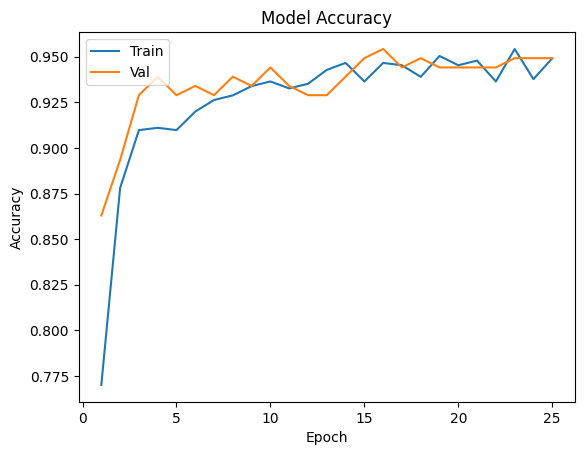

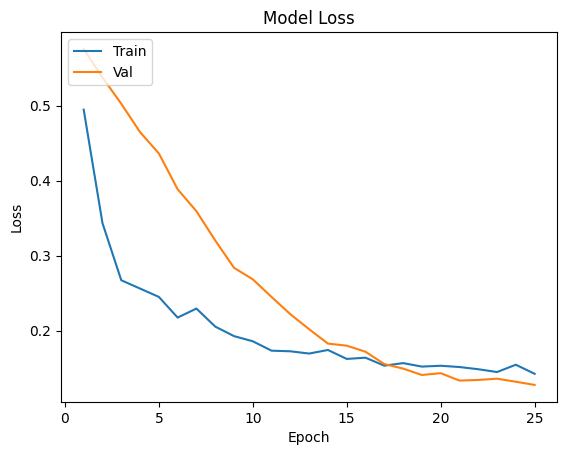

In [ ]:
learning_curve(history , 25)

#**MODEL FOR OVERSAMPLING**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 1. Load the Kaggle dataset
data = pd.read_csv('/content/creditcard.csv')  #  downloaded the dataset

# 2. Data Exploration and Preprocessing
# Standardize the 'Amount' column
scaler = StandardScaler()
data['Amount'] = scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# 3. Split the Dataset
X = data.drop('Class', axis=1)
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42, stratify=y_train)

# Reshape for CNN (CNNs expect 3D input)
X_train_cnn = X_train.values.reshape(X_train.shape[0], X_train.shape[1], 1)
X_val_cnn = X_val.values.reshape(X_val.shape[0], X_val.shape[1], 1)
X_test_cnn = X_test.values.reshape(X_test.shape[0], X_test.shape[1], 1)

# --- Define CNN Model ---
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

opt = tf.keras.optimizers.Adam(learning_rate = 0.001)

# Compile the model
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_cnn, y_train, epochs=25, validation_data=(X_val_cnn, y_val))

# --- Random Forest Model ---
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# --- XGBoost Model ---
xgb_model = XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# 5. Model Evaluation
def evaluate_model(model, X_test, y_test):
    if isinstance(model, tf.keras.Model):
        y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

# Evaluate models
print("CNN Model Evaluation:")
evaluate_model(model, X_test_cnn, y_test)

print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

print("Model Training Complete. Models Available: CNN, Random Forest, XGBoost.")

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5341/5341 ━━━━━━━━━━━━━━━━━━━━ 21s 4ms/step - accuracy: 0.9957 - loss: 4.3568 - val_accuracy: 0.9984 - val_loss: 1.5590
Epoch 2/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9987 - loss: 0.1827 - val_accuracy: 0.9991 - val_loss: 0.0136
Epoch 3/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 21s 3ms/step - accuracy: 0.9993 - loss: 0.0094 - val_accuracy: 0.9992 - val_loss: 0.0075
Epoch 4/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.9993 - loss: 0.0162 - val_accuracy: 0.9989 - val_loss: 0.0075
Epoch 5/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9993 - loss: 0.0064 - val_accuracy: 0.9993 - val_loss: 0.0064
Epoch 6/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 20s 4ms/step - accuracy: 0.9992 - loss: 0.0115 - val_accuracy: 0.9992 - val_loss: 0.0085
Epoch 7/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 39s 3ms/step - accuracy: 0.9994 - loss: 0.0077 - val_accuracy: 0.9993 - val_loss: 0.0057
Epoch 8/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9986 - loss: 0.0195 - val



**Confusion Matrix**

The confusion matrix provides insight into the true positives, true negatives, false positives, and false negatives.

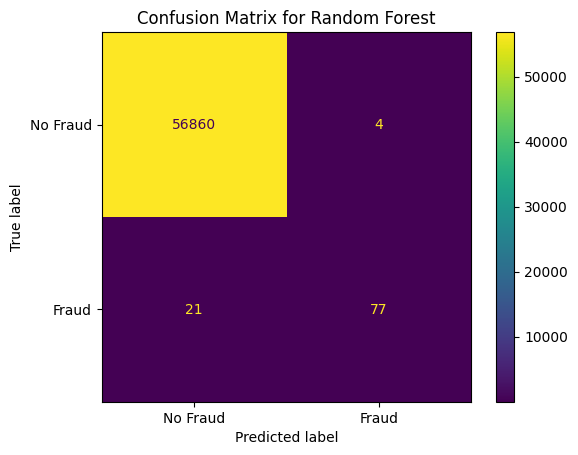

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
    disp.plot(cmap='viridis')
    plt.title(f"Confusion Matrix for {model_name}")
    plt.show()

# Example for Random Forest
plot_confusion_matrix(rf_model, X_test, y_test, "Random Forest")


**ROC CURVE**

The Receiver Operating Characteristic (ROC) curve shows the trade-off between true positive rate (sensitivity) and false positive rate.


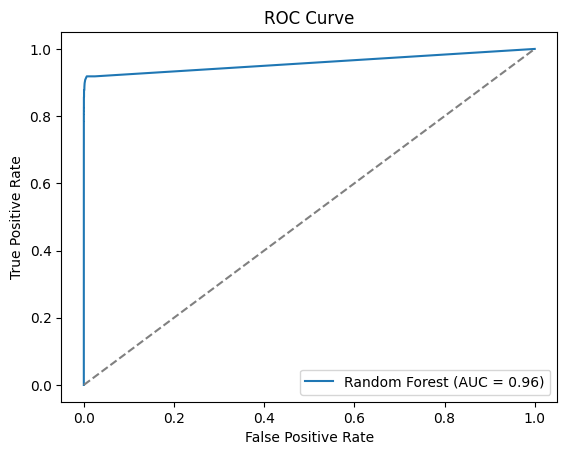

In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]  # Use probabilities for positive class
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

# Example for Random Forest
plot_roc_curve(rf_model, X_test, y_test, "Random Forest")


**Precision-Recall Curve**

The precision-recall curve is particularly useful for imbalanced datasets like fraud detection.


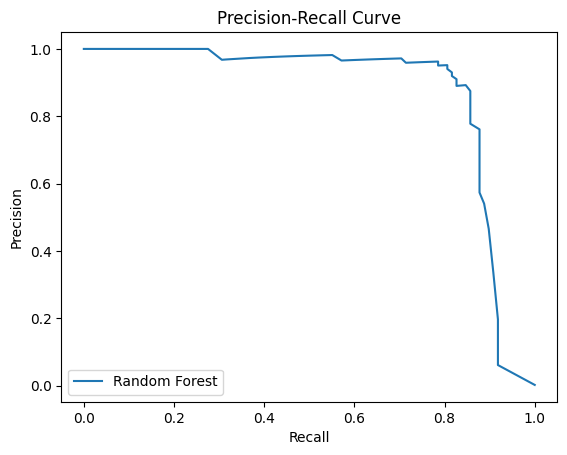

In [ ]:
from sklearn.metrics import precision_recall_curve

def plot_precision_recall_curve(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob)

    plt.figure()
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower left")
    plt.show()

# Example for Random Forest
plot_precision_recall_curve(rf_model, X_test, y_test, "Random Forest")


**Feature Importance**

For models like Random Forest or XGBoost, you can plot the importance of each feature.



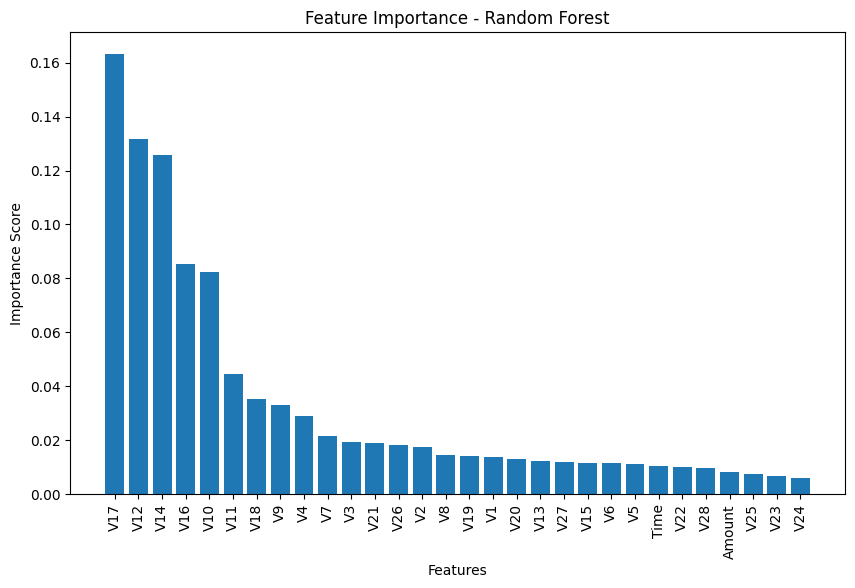

In [ ]:
def plot_feature_importance(model, feature_names, model_name):
    importance = model.feature_importances_
    indices = np.argsort(importance)[::-1]

    plt.figure(figsize=(10, 6))
    plt.bar(range(len(importance)), importance[indices], align="center")
    plt.xticks(range(len(importance)), [feature_names[i] for i in indices], rotation=90)
    plt.title(f"Feature Importance - {model_name}")
    plt.xlabel("Features")
    plt.ylabel("Importance Score")
    plt.show()

# Example for Random Forest
plot_feature_importance(rf_model, X.columns, "Random Forest")


**Learning Curve**

To analyze overfitting or underfitting, plot the training and validation loss/accuracy over epochs for the CNN model.

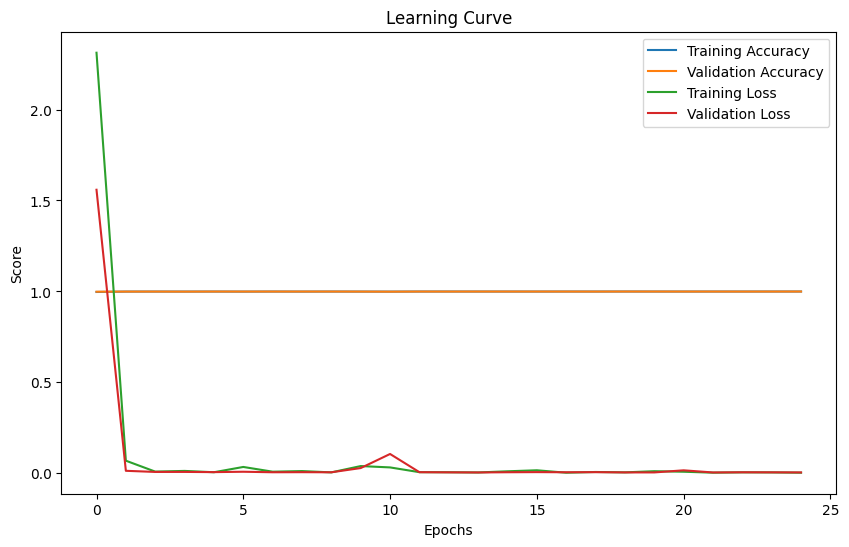

In [ ]:
def plot_learning_curve(history):
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Score')
    plt.legend()
    plt.title('Learning Curve')
    plt.show()

# Example for CNN Model
plot_learning_curve(history)


 **Distribution of Predictions**

Visualize the predicted probabilities for fraud and non-fraud cases.

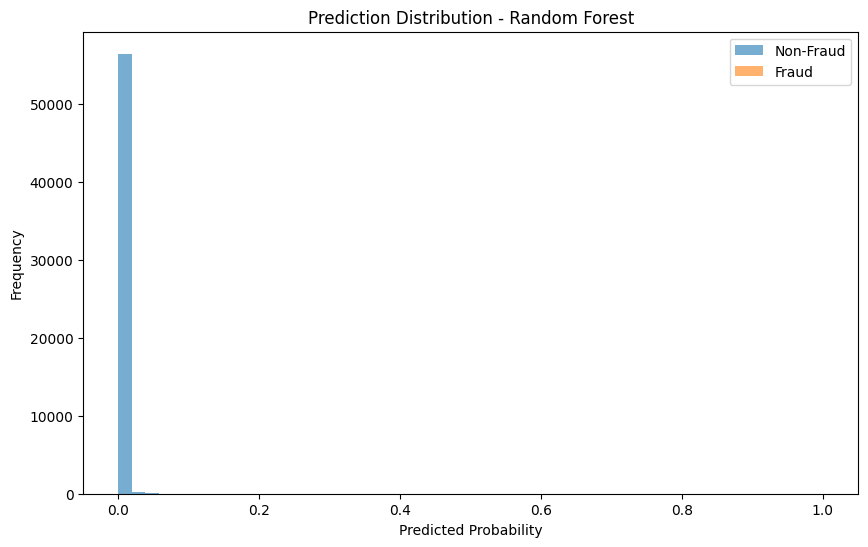

In [ ]:
def plot_prediction_distribution(model, X_test, y_test, model_name):
    y_prob = model.predict_proba(X_test)[:, 1]
    plt.figure(figsize=(10, 6))
    plt.hist(y_prob[y_test == 0], bins=50, alpha=0.6, label='Non-Fraud')
    plt.hist(y_prob[y_test == 1], bins=50, alpha=0.6, label='Fraud')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.title(f"Prediction Distribution - {model_name}")
    plt.legend()
    plt.show()

# Example for Random Forest
plot_prediction_distribution(rf_model, X_test, y_test, "Random Forest")

**Classification Report**

Print a detailed classification report showing precision, recall, F1-score, and support.

In [ ]:
from sklearn.metrics import classification_report

def print_classification_report(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred, target_names=['No Fraud', 'Fraud']))

# Example for Random Forest
print_classification_report(rf_model, X_test, y_test)


              precision    recall  f1-score   support

    No Fraud       1.00      1.00      1.00     56864
       Fraud       0.95      0.79      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962




###1. **Model Hyperparameter Tuning**


In [ ]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_dist = {'n_estimators': [100, 200, 300],
              'max_depth': [3, 4, 5, 6],
              'learning_rate': [0.01, 0.1, 0.3]}

# Create your XGBoost model before using it in RandomizedSearchCV
xgb_model = xgb.XGBClassifier()  # Or any other XGBoost model

random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, cv=3)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.3}


###2. **Handling Class Imbalance**




In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Retrain the model on the resampled data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(random_state=42)

### 4. Advanced Model Architecture (Deep Learning)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, BatchNormalization, Dropout, Flatten, Dense, Reshape # Import Reshape

model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    BatchNormalization(),
    Dropout(0.2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train_cnn, y_train, epochs=25, validation_data=(X_val_cnn, y_val))

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5341/5341 ━━━━━━━━━━━━━━━━━━━━ 25s 4ms/step - accuracy: 0.9968 - loss: 0.0112 - val_accuracy: 0.9993 - val_loss: 0.0052
Epoch 2/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 40s 4ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9992 - val_loss: 0.0049
Epoch 3/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 43s 5ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0052
Epoch 4/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accuracy: 0.9993 - val_loss: 0.0058
Epoch 5/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - accuracy: 0.9994 - loss: 0.0036 - val_accuracy: 0.9993 - val_loss: 0.0049
Epoch 6/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - accuracy: 0.9995 - loss: 0.0030 - val_accuracy: 0.9989 - val_loss: 0.0052
Epoch 7/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 23s 4ms/step - accuracy: 0.9994 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0048
Epoch 8/25
5341/5341 ━━━━━━━━━━━━━━━━━━━━ 22s 4ms/step - accuracy: 0.9992 - loss: 0.0043 - val

### 6. Model summary.



In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 28, 32)              │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_3 (MaxPooling1D)       │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 14, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 448)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │          28,736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,045 (340.02 KB)

 Trainable params: 28,993 (113.25 KB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 57,988 (226.52 KB)

### 7. Model Comparison and Ensemble



In [ ]:
!pip install scikeras

  Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (18 kB)
Using cached scikit_learn-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (13.5 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [ ]:
xgb_model = XGBClassifier(n_estimators=200, max_depth=6, learning_rate=0.3, random_state=42)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report


# Wrap your CNN model
cnn_clf = KerasClassifier(model=model, epochs=10, batch_size=32, verbose=0)

# Combine models
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators=[
        ('cnn', cnn_clf),
        ('rf', rf_model),
        ('xgb', xgb_model)
    ],
    voting='soft'
)

# Fit the voting classifier
voting_clf.fit(X_train, y_train)

# Evaluate voting classifier
y_pred = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred = voting_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, voting_clf.predict_proba(X_test)[:, 1])
print("ENcembled model:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

def evaluate_model(model, X_test, y_test):
    if isinstance(model, tf.keras.Model):
        y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions
    else:
        y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"AUC: {auc:.4f}")

# Evaluate models
print("CNN Model Evaluation:")
evaluate_model(model, X_test_cnn, y_test)

print("\nRandom Forest Model Evaluation:")
evaluate_model(rf_model, X_test, y_test)

print("\nXGBoost Model Evaluation:")
evaluate_model(xgb_model, X_test, y_test)

ENcembled model:
Accuracy: 0.9996
Precision: 0.9195
Recall: 0.8163
F1-Score: 0.8649
AUC: 0.9810
CNN Model Evaluation:
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Accuracy: 0.9994
Precision: 0.8163
Recall: 0.8163
F1-Score: 0.8163
AUC: 0.9080

Random Forest Model Evaluation:
Accuracy: 0.9995
Precision: 0.8384
Recall: 0.8469
F1-Score: 0.8426
AUC: 0.9233

XGBoost Model Evaluation:
Accuracy: 0.9996
Precision: 0.9518
Recall: 0.8061
F1-Score: 0.8729
AUC: 0.9030


In [ ]:
import joblib

joblib.dump(rf_model, 'rf_model.pkl')  # Save the model
loaded_model = joblib.load('rf_model.pkl')  # Load the model


joblib.dump(rf_model, 'xgb_model.pkl')  # Save the model
loaded_model = joblib.load('xgb_model.pkl')  # Load the model

# Saving the CNN model
model.save('cnn_model.h5')  # Saves the model to an HDF5 file

# Loading the CNN model
loaded_cnn_model = tf.keras.models.load_model('cnn_model.h5')

# Save the VotingClassifier model
joblib.dump(voting_clf, 'ensemble_model.pkl')

['ensemble_model.pkl']

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
               Accuracy  Precision    Recall  F1-Score       AUC
CNN            0.999368   0.816327  0.816327  0.816327  0.908005
Random Forest  0.999456   0.838384  0.846939  0.842640  0.923329
XGBoost        0.999579   0.940476  0.806122  0.868132  0.903017
Ensemble       0.999561   0.919540  0.816327  0.864865  0.908102


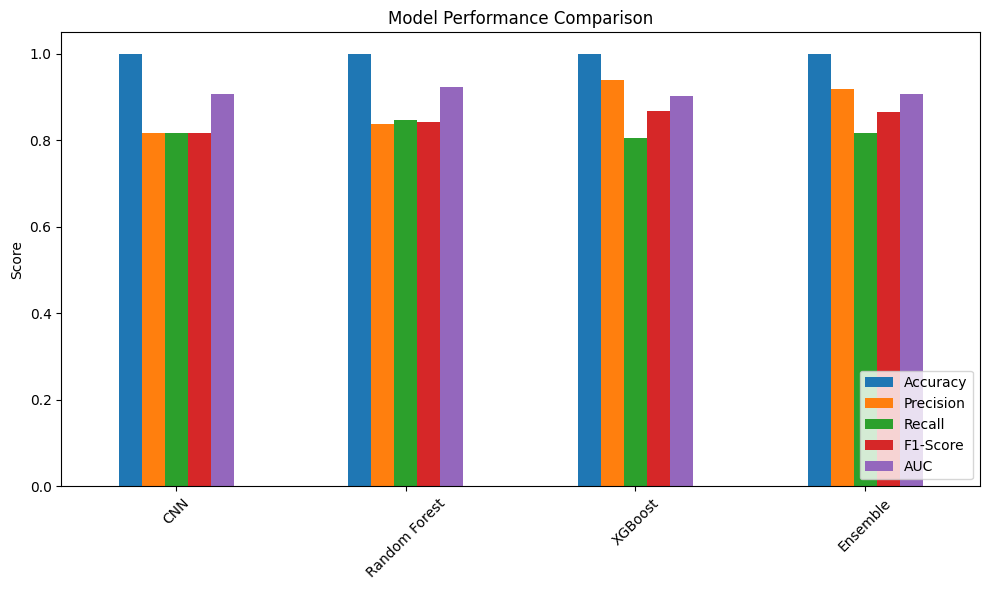

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


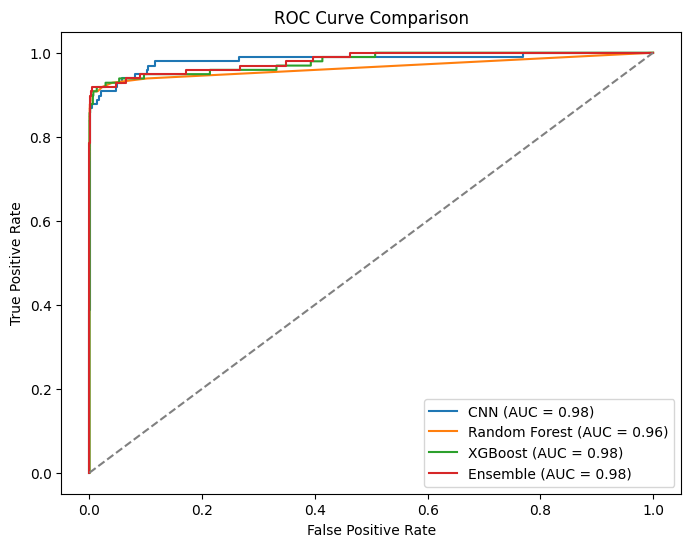

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


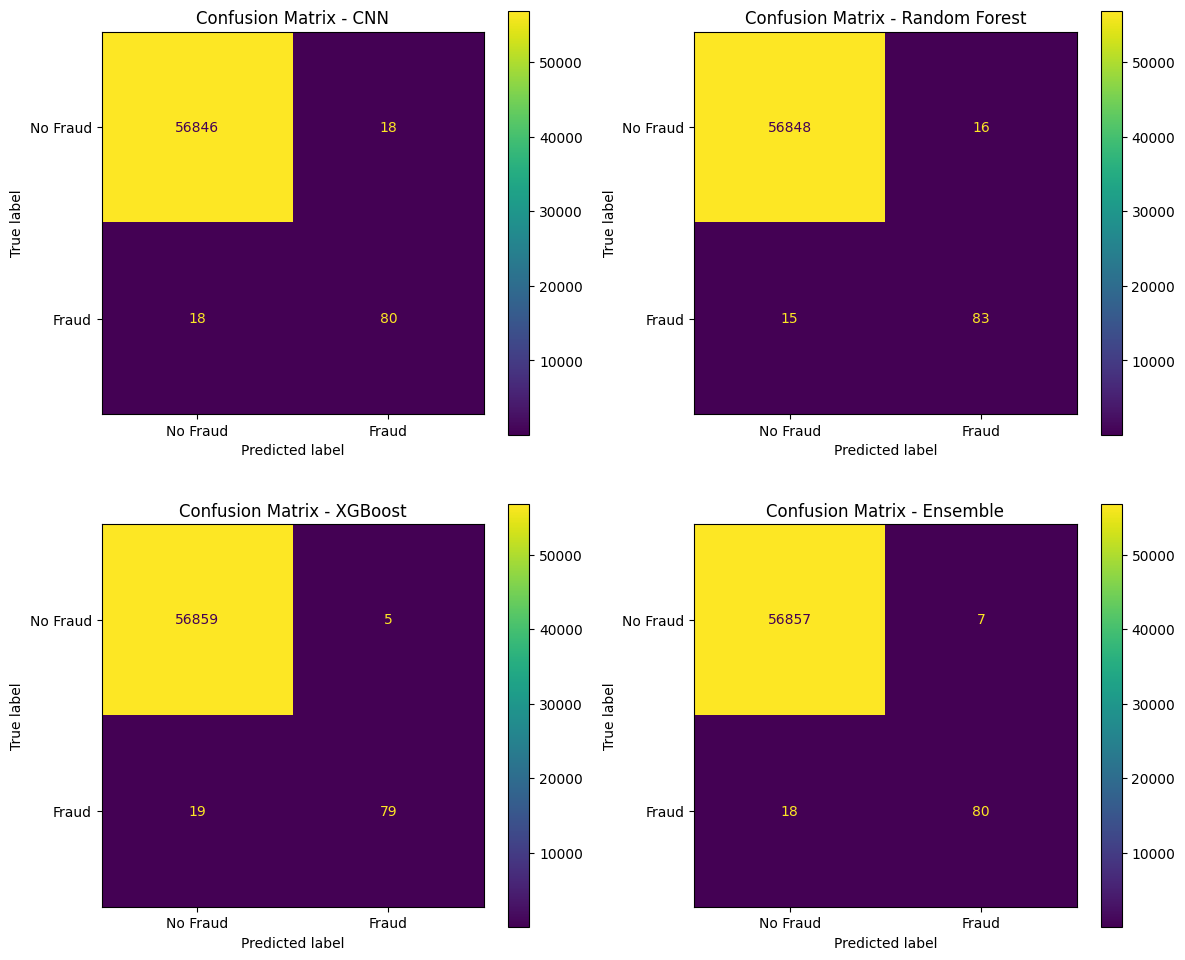

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier

# 1. Evaluate each model using relevant metrics
models = {
    "CNN": model,
    "Random Forest": rf_model,
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42).fit(X_train, y_train),  # Re-fit XGBoost
    "Ensemble": voting_clf
}

results = {}
for model_name, model in models.items():
    if model_name == "CNN":
        y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)

    results[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_pred)
    }

# 2. Display the results in a table
import pandas as pd
results_df = pd.DataFrame(results).T
print(results_df)

# 3. Visualize the results
# a. Bar plot for comparing metrics
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

# b. ROC curves for comparing models
plt.figure(figsize=(8, 6))
for model_name, model in models.items():
    if model_name == "CNN":
        y_prob = model.predict(X_test_cnn)
    else:
        y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# c. Confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.ravel()

for i, (model_name, model) in enumerate(models.items()):
    if model_name == "CNN":
        y_pred = (model.predict(X_test_cnn) > 0.5).astype(int)
    else:
        y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Fraud', 'Fraud'])
    disp.plot(ax=axes[i], cmap='viridis')
    axes[i].set_title(f'Confusion Matrix - {model_name}')

plt.tight_layout()
plt.show()